In [693]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA





In [694]:
data=pd.read_csv('masked_kiva_loans.csv')

In [695]:
data

id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count borrower_genders  \
0           245.0              14            14           female   
1           145.0              14            13           female   
2           159.0              14            29           female   
3           136.0               8             1           female   
4           133.0              12            11           female   
...           ...             ...           ...              ...   
33556       247.0              14            18           female   
33557       247.0              12            12           female   
33558       421.0              14             9           female   
33559        80.0              27            54             male   
33560       247.0              12            27   female, female   

      repayment_interval        date  
0                monthly   2/20/2017  
1              irregular  10/11/2016  
2                 bullet   7/25/2016  
3              irregular    6/2/2017  
4                monthly   3/25/2015  
...                  ...         ...  
33556            monthly   5/18/2015  
33557          irregular    2/2/2016  
33558            monthly   1/23/2015  
33559            monthly   7/21/2015  
33560          irregular   8/13/2015  

[33561 rows x 11 columns]

In [696]:
data.isna().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64

In [697]:
data.dtypes

id                      int64
funded_amount           int64
loan_amount             int64
sector                 object
country                object
partner_id            float64
term_in_months          int64
lender_count            int64
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [698]:
data['borrower_genders'].unique()

array(['female', 'male, female',
       'female, female, female, male, female, male, female, female, female, female, female',
       ...,
       'female, male, female, male, female, female, male, female, male, female, female, male, female, female, male, male, female, female, female, female, female, male, male, male, male, female, female, female',
       'male, male, female, male, male, male, male, male, male, male, female, male, female, male, male',
       'female, female, male, female, male, male, female, male, female'],
      dtype=object)

In [699]:
data['borrower_genders'].replace(' ', np.NaN , inplace=True )

In [700]:
data['borrower_genders'].isna().count()

33561

In [701]:
data.head(10)

id  funded_amount  loan_amount       sector      country  partner_id  \
0  1242201            500          500  Agriculture     Pakistan       245.0   
1  1165778            325          325  Agriculture  Philippines       145.0   
2  1123052            800          800  Agriculture      Ecuador       159.0   
3  1312344            425          425  Agriculture  Philippines       136.0   
4   861422            275          275  Agriculture        Kenya       133.0   
5   864504            350          350  Agriculture     Pakistan       245.0   
6  1023952            200          200  Agriculture  Philippines       145.0   
7   690323            575          575  Agriculture      Georgia       181.0   
8   749263            325          325  Agriculture      Nigeria       288.0   
9   928716            500          500  Agriculture        Kenya       156.0   

   term_in_months  lender_count borrower_genders repayment_interval  \
0              14            14           female            monthly   
1              14            13           female          irregular   
2              14            29           female             bullet   
3               8             1           female          irregular   
4              12            11           female            monthly   
5              14            14           female            monthly   
6               7             8           female          irregular   
7              15            20           female            monthly   
8              17            13           female             bullet   
9              16            10           female            monthly   

         date  
0   2/20/2017  
1  10/11/2016  
2   7/25/2016  
3    6/2/2017  
4   3/25/2015  
5   3/31/2015  
6   2/17/2016  
7   3/28/2014  
8    8/4/2014  
9    8/6/2015

In [702]:
data['borrower_genders'] = data['borrower_genders'].astype(str)

In [703]:

def count_gender_in_classes(df, gender_column):
    # Define a function to count the occurrences of 'male' and 'female'
    def count_occurrences(cell, gender):
        # Count gender occurrences in a cell, handling missing values and ensuring exact matches
        genders = cell.lower().split(',') if pd.notnull(cell) else []
        return sum(gender_str.strip() == gender for gender_str in genders)

    # Apply the counting function to the gender column for both genders
    df['male_count'] = df[gender_column].apply(lambda cell: count_occurrences(cell, 'male'))
    df['female_count'] = df[gender_column].apply(lambda cell: count_occurrences(cell, 'female'))

    return df



data = count_gender_in_classes(data,'borrower_genders')
data





id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count borrower_genders  \
0           245.0              14            14           female   
1           145.0              14            13           female   
2           159.0              14            29           female   
3           136.0               8             1           female   
4           133.0              12            11           female   
...           ...             ...           ...              ...   
33556       247.0              14            18           female   
33557       247.0              12            12           female   
33558       421.0              14             9           female   
33559        80.0              27            54             male   
33560       247.0              12            27   female, female   

      repayment_interval        date  male_count  female_count  
0                monthly   2/20/2017           0             1  
1              irregular  10/11/2016           0             1  
2                 bullet   7/25/2016           0             1  
3              irregular    6/2/2017           0             1  
4                monthly   3/25/2015           0             1  
...                  ...         ...         ...           ...  
33556            monthly   5/18/2015           0             1  
33557          irregular    2/2/2016           0             1  
33558            monthly   1/23/2015           0             1  
33559            monthly   7/21/2015           1             0  
33560          irregular   8/13/2015           0             2  

[33561 rows x 13 columns]

In [704]:
data['female_count'].unique()

array([ 1,  9,  0,  3, 17,  5, 12, 10,  4,  8,  7,  2, 11,  6, 19, 13, 22,
       14, 15, 18, 20, 23, 41, 36, 16, 25, 31, 21, 33, 26, 28, 27, 24, 32,
       29, 30, 40, 37, 38, 45, 35])

In [705]:
data.drop('borrower_genders', axis=1, inplace=True)

In [706]:
data = data[(data['female_count'] != 0) | (data['male_count'] != 0)]

In [707]:
data

id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count repayment_interval  \
0           245.0              14            14            monthly   
1           145.0              14            13          irregular   
2           159.0              14            29             bullet   
3           136.0               8             1          irregular   
4           133.0              12            11            monthly   
...           ...             ...           ...                ...   
33556       247.0              14            18            monthly   
33557       247.0              12            12          irregular   
33558       421.0              14             9            monthly   
33559        80.0              27            54            monthly   
33560       247.0              12            27          irregular   

             date  male_count  female_count  
0       2/20/2017           0             1  
1      10/11/2016           0             1  
2       7/25/2016           0             1  
3        6/2/2017           0             1  
4       3/25/2015           0             1  
...           ...         ...           ...  
33556   5/18/2015           0             1  
33557    2/2/2016           0             1  
33558   1/23/2015           0             1  
33559   7/21/2015           1             0  
33560   8/13/2015           0             2  

[33366 rows x 12 columns]

In [708]:
data.isna().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            614
term_in_months          0
lender_count            0
repayment_interval      0
date                    0
male_count              0
female_count            0
dtype: int64

In [709]:
data['partner_id'].fillna(value=0,inplace=True)

<ipython-input-709-86b3df56c470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['partner_id'].fillna(value=0,inplace=True)


In [710]:
data = data[(data['partner_id'] != 0)]

In [711]:
data

id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count repayment_interval  \
0           245.0              14            14            monthly   
1           145.0              14            13          irregular   
2           159.0              14            29             bullet   
3           136.0               8             1          irregular   
4           133.0              12            11            monthly   
...           ...             ...           ...                ...   
33556       247.0              14            18            monthly   
33557       247.0              12            12          irregular   
33558       421.0              14             9            monthly   
33559        80.0              27            54            monthly   
33560       247.0              12            27          irregular   

             date  male_count  female_count  
0       2/20/2017           0             1  
1      10/11/2016           0             1  
2       7/25/2016           0             1  
3        6/2/2017           0             1  
4       3/25/2015           0             1  
...           ...         ...           ...  
33556   5/18/2015           0             1  
33557    2/2/2016           0             1  
33558   1/23/2015           0             1  
33559   7/21/2015           1             0  
33560   8/13/2015           0             2  

[32752 rows x 12 columns]

In [712]:
data.drop_duplicates(inplace=True)

<ipython-input-712-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [713]:
data

id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count repayment_interval  \
0           245.0              14            14            monthly   
1           145.0              14            13          irregular   
2           159.0              14            29             bullet   
3           136.0               8             1          irregular   
4           133.0              12            11            monthly   
...           ...             ...           ...                ...   
33556       247.0              14            18            monthly   
33557       247.0              12            12          irregular   
33558       421.0              14             9            monthly   
33559        80.0              27            54            monthly   
33560       247.0              12            27          irregular   

             date  male_count  female_count  
0       2/20/2017           0             1  
1      10/11/2016           0             1  
2       7/25/2016           0             1  
3        6/2/2017           0             1  
4       3/25/2015           0             1  
...           ...         ...           ...  
33556   5/18/2015           0             1  
33557    2/2/2016           0             1  
33558   1/23/2015           0             1  
33559   7/21/2015           1             0  
33560   8/13/2015           0             2  

[32752 rows x 12 columns]

In [714]:
data.columns

Index(['id', 'funded_amount', 'loan_amount', 'sector', 'country', 'partner_id',
       'term_in_months', 'lender_count', 'repayment_interval', 'date',
       'male_count', 'female_count'],
      dtype='object')

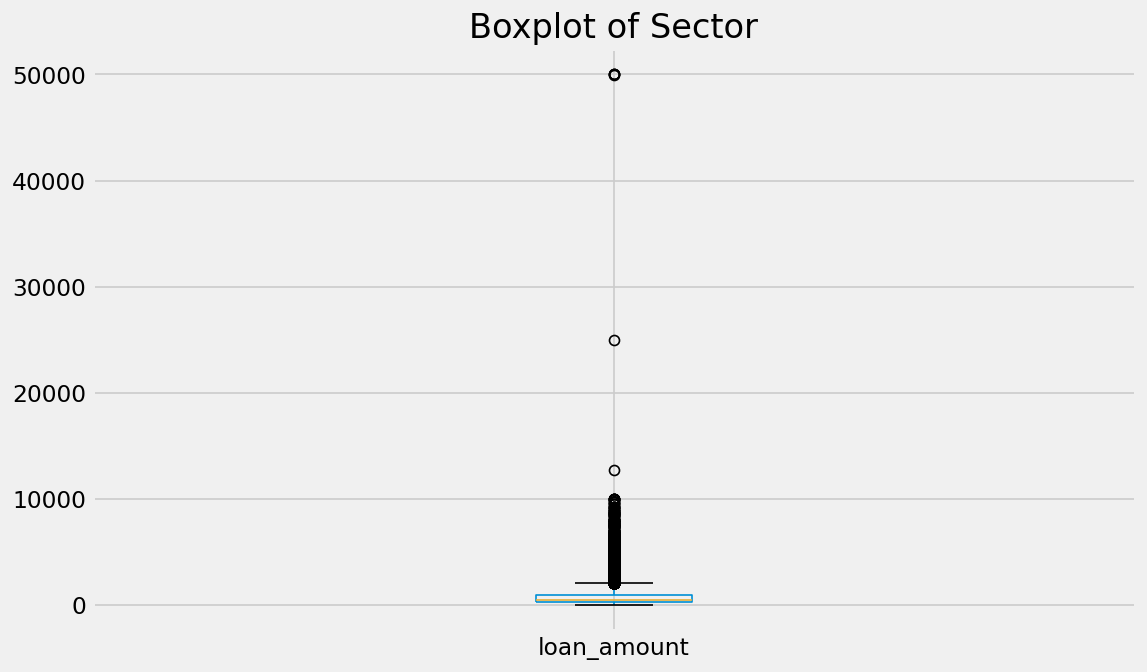

In [715]:
plt.figure(figsize=(10, 6))
data.boxplot(column='loan_amount')
plt.title(f'Boxplot of Sector')
plt.show()






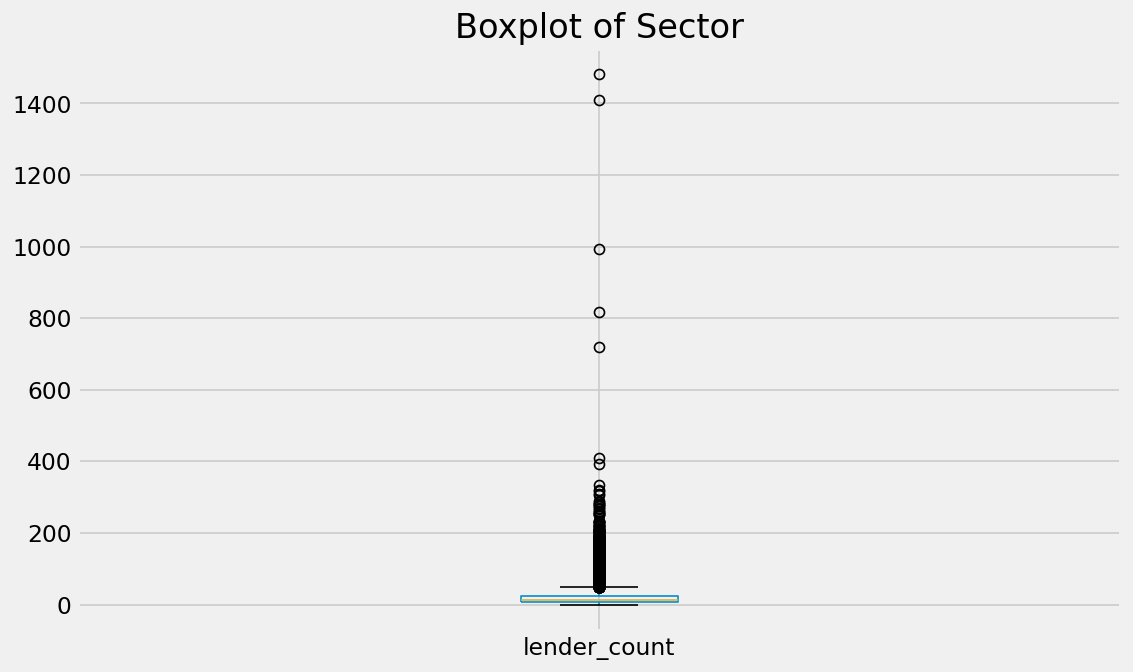

In [716]:
plt.figure(figsize=(10, 6))
data.boxplot(column='lender_count')
plt.title(f'Boxplot of Sector')
plt.show()

In [717]:
# Assuming 'df' is your DataFrame
Q1 = data['loan_amount'].quantile(0.25)
Q3 = data['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# Filter out outliers and keep only valid rows

data = data[(data['loan_amount'] >= lower_bound) & (data['loan_amount'] <= upper_bound)]

-775.0
2025.0


In [718]:
data.head()

id  funded_amount  loan_amount       sector      country  partner_id  \
0  1242201            500          500  Agriculture     Pakistan       245.0   
1  1165778            325          325  Agriculture  Philippines       145.0   
2  1123052            800          800  Agriculture      Ecuador       159.0   
3  1312344            425          425  Agriculture  Philippines       136.0   
4   861422            275          275  Agriculture        Kenya       133.0   

   term_in_months  lender_count repayment_interval        date  male_count  \
0              14            14            monthly   2/20/2017           0   
1              14            13          irregular  10/11/2016           0   
2              14            29             bullet   7/25/2016           0   
3               8             1          irregular    6/2/2017           0   
4              12            11            monthly   3/25/2015           0   

   female_count  
0             1  
1             1  
2             1  
3             1  
4             1

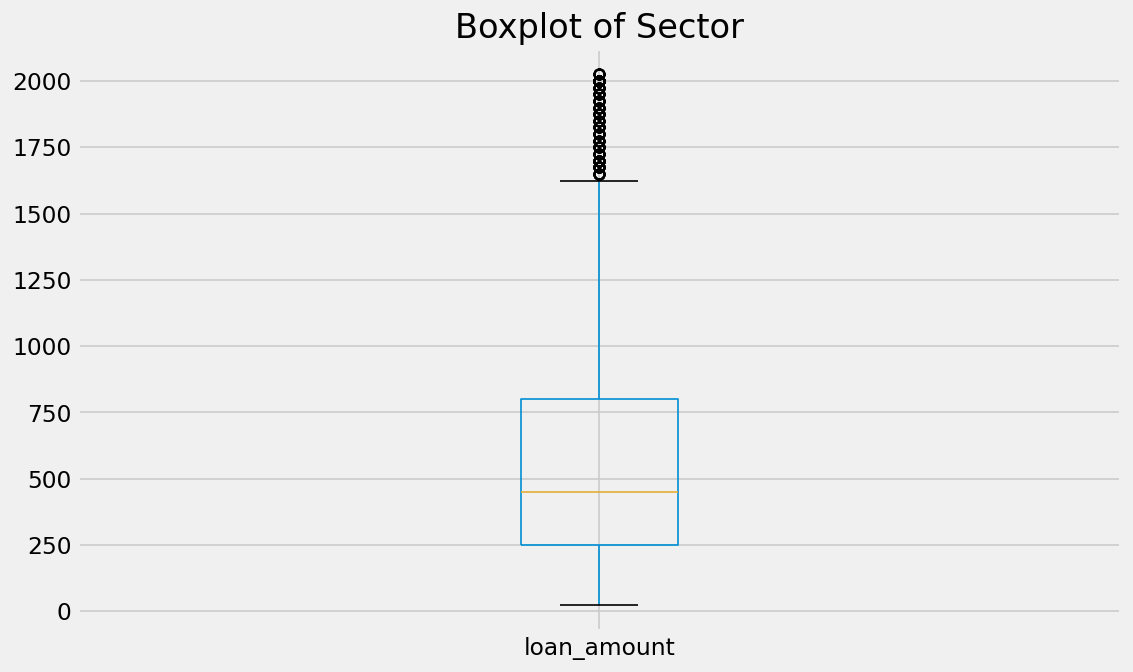

In [719]:
plt.figure(figsize=(10, 6))
data.boxplot(column='loan_amount')
plt.title(f'Boxplot of Sector')
plt.show()






In [720]:
data

id  funded_amount  loan_amount       sector      country  \
0      1242201            500          500  Agriculture     Pakistan   
1      1165778            325          325  Agriculture  Philippines   
2      1123052            800          800  Agriculture      Ecuador   
3      1312344            425          425  Agriculture  Philippines   
4       861422            275          275  Agriculture        Kenya   
...        ...            ...          ...          ...          ...   
33556   886976            500          500    Wholesale     Pakistan   
33557  1017003            300          300    Wholesale     Pakistan   
33558   831649            225          225    Wholesale     Pakistan   
33559   920920           2000         2000    Wholesale    Palestine   
33560   931675            750          750    Wholesale     Pakistan   

       partner_id  term_in_months  lender_count repayment_interval  \
0           245.0              14            14            monthly   
1           145.0              14            13          irregular   
2           159.0              14            29             bullet   
3           136.0               8             1          irregular   
4           133.0              12            11            monthly   
...           ...             ...           ...                ...   
33556       247.0              14            18            monthly   
33557       247.0              12            12          irregular   
33558       421.0              14             9            monthly   
33559        80.0              27            54            monthly   
33560       247.0              12            27          irregular   

             date  male_count  female_count  
0       2/20/2017           0             1  
1      10/11/2016           0             1  
2       7/25/2016           0             1  
3        6/2/2017           0             1  
4       3/25/2015           0             1  
...           ...         ...           ...  
33556   5/18/2015           0             1  
33557    2/2/2016           0             1  
33558   1/23/2015           0             1  
33559   7/21/2015           1             0  
33560   8/13/2015           0             2  

[30304 rows x 12 columns]

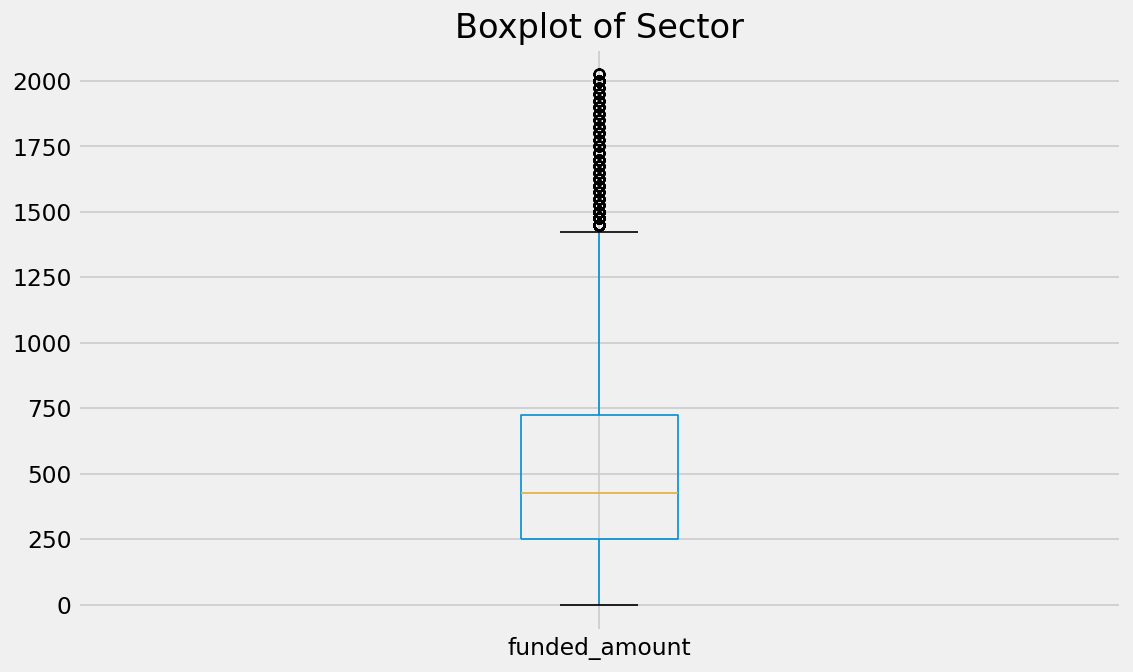

In [721]:
plt.figure(figsize=(10, 6))
data.boxplot(column='funded_amount')
plt.title(f'Boxplot of Sector')
plt.show()

In [722]:
data.dtypes

id                      int64
funded_amount           int64
loan_amount             int64
sector                 object
country                object
partner_id            float64
term_in_months          int64
lender_count            int64
repayment_interval     object
date                   object
male_count              int64
female_count            int64
dtype: object

In [723]:
data.describe()

id  funded_amount   loan_amount    partner_id  \
count  3.030400e+04   30304.000000  30304.000000  30304.000000   
mean   9.937539e+05     549.741783    581.031382    179.179448   
std    1.975304e+05     414.034448    428.981348     91.816143   
min    6.530490e+05       0.000000     25.000000      9.000000   
25%    8.211812e+05     250.000000    250.000000    133.000000   
50%    9.926440e+05     425.000000    450.000000    145.000000   
75%    1.168023e+06     725.000000    800.000000    204.000000   
max    1.340239e+06    2025.000000   2025.000000    533.000000   

       term_in_months  lender_count    male_count  female_count  
count    30304.000000  30304.000000  30304.000000  30304.000000  
mean        13.561180     15.837645      0.352231      1.141037  
std          7.748089     13.147223      0.900016      1.536037  
min          2.000000      0.000000      0.000000      0.000000  
25%          8.000000      7.000000      0.000000      1.000000  
50%         13.000000     12.000000      0.000000      1.000000  
75%         14.000000     21.000000      1.000000      1.000000  
max        131.000000     78.000000     24.000000     25.000000

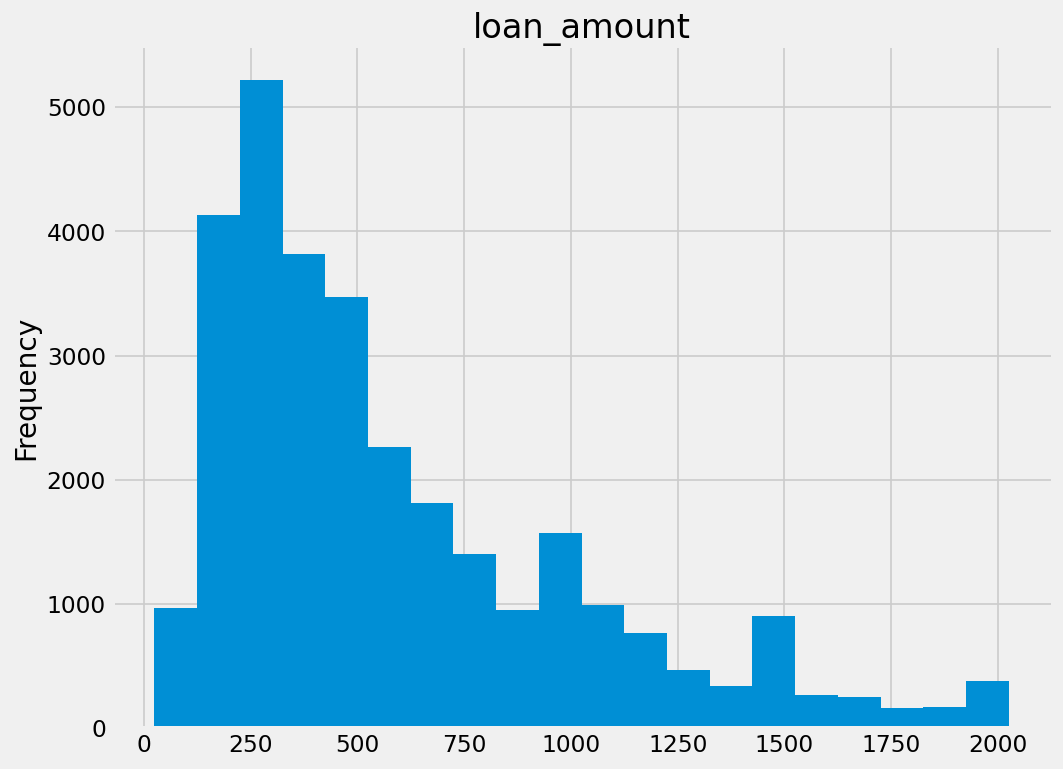

In [724]:

data['loan_amount'].plot(kind='hist', bins=20, title='loan_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

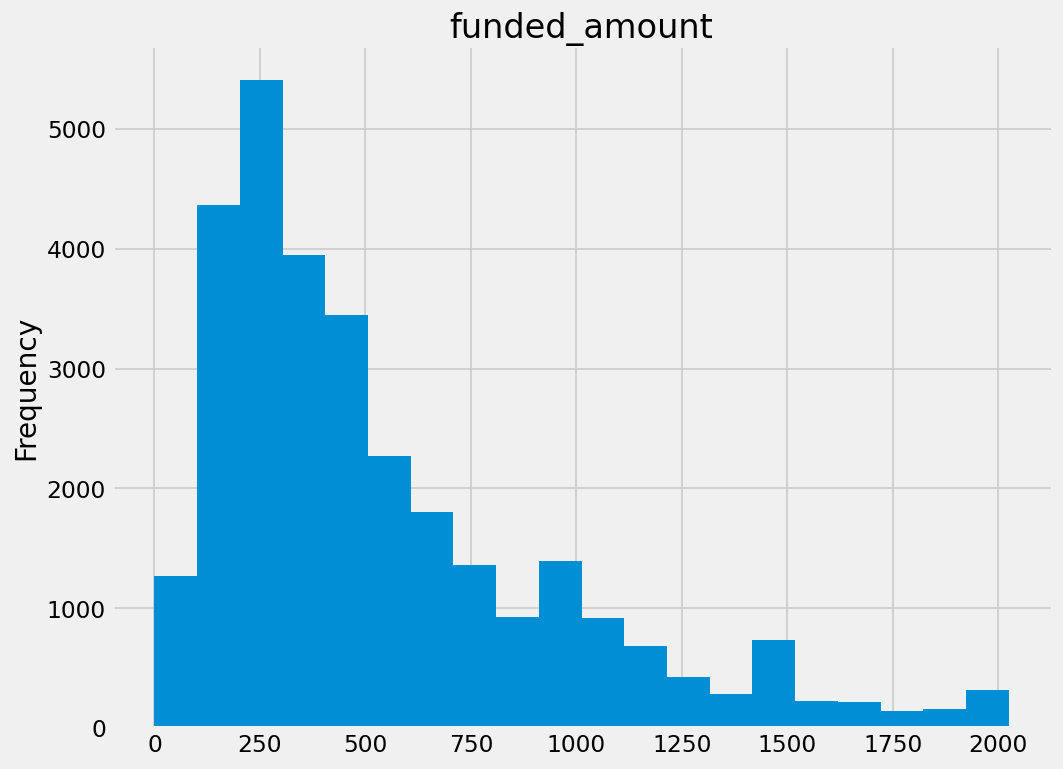

In [725]:



data['funded_amount'].plot(kind='hist', bins=20, title='funded_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

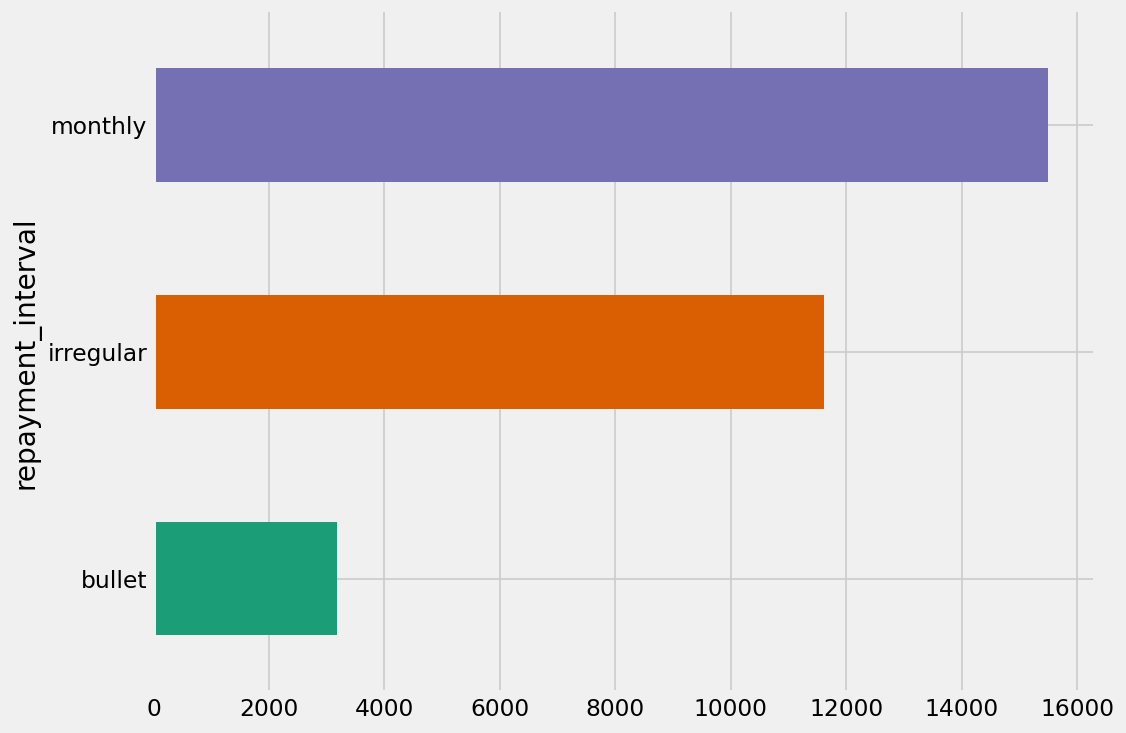

In [726]:
data.groupby('repayment_interval').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [727]:
data.to_csv('newCleanData.csv',index=False)

In [728]:
y=data['funded_amount']
x = data.drop(['sector', 'country', 'repayment_interval', 'date', 'funded_amount'], axis=1)
z=data.drop(['sector', 'country', 'repayment_interval', 'date'], axis=1)

In [729]:
x

id  loan_amount  partner_id  term_in_months  lender_count  \
0      1242201          500       245.0              14            14   
1      1165778          325       145.0              14            13   
2      1123052          800       159.0              14            29   
3      1312344          425       136.0               8             1   
4       861422          275       133.0              12            11   
...        ...          ...         ...             ...           ...   
33556   886976          500       247.0              14            18   
33557  1017003          300       247.0              12            12   
33558   831649          225       421.0              14             9   
33559   920920         2000        80.0              27            54   
33560   931675          750       247.0              12            27   

       male_count  female_count  
0               0             1  
1               0             1  
2               0             1  
3               0             1  
4               0             1  
...           ...           ...  
33556           0             1  
33557           0             1  
33558           0             1  
33559           1             0  
33560           0             2  

[30304 rows x 7 columns]

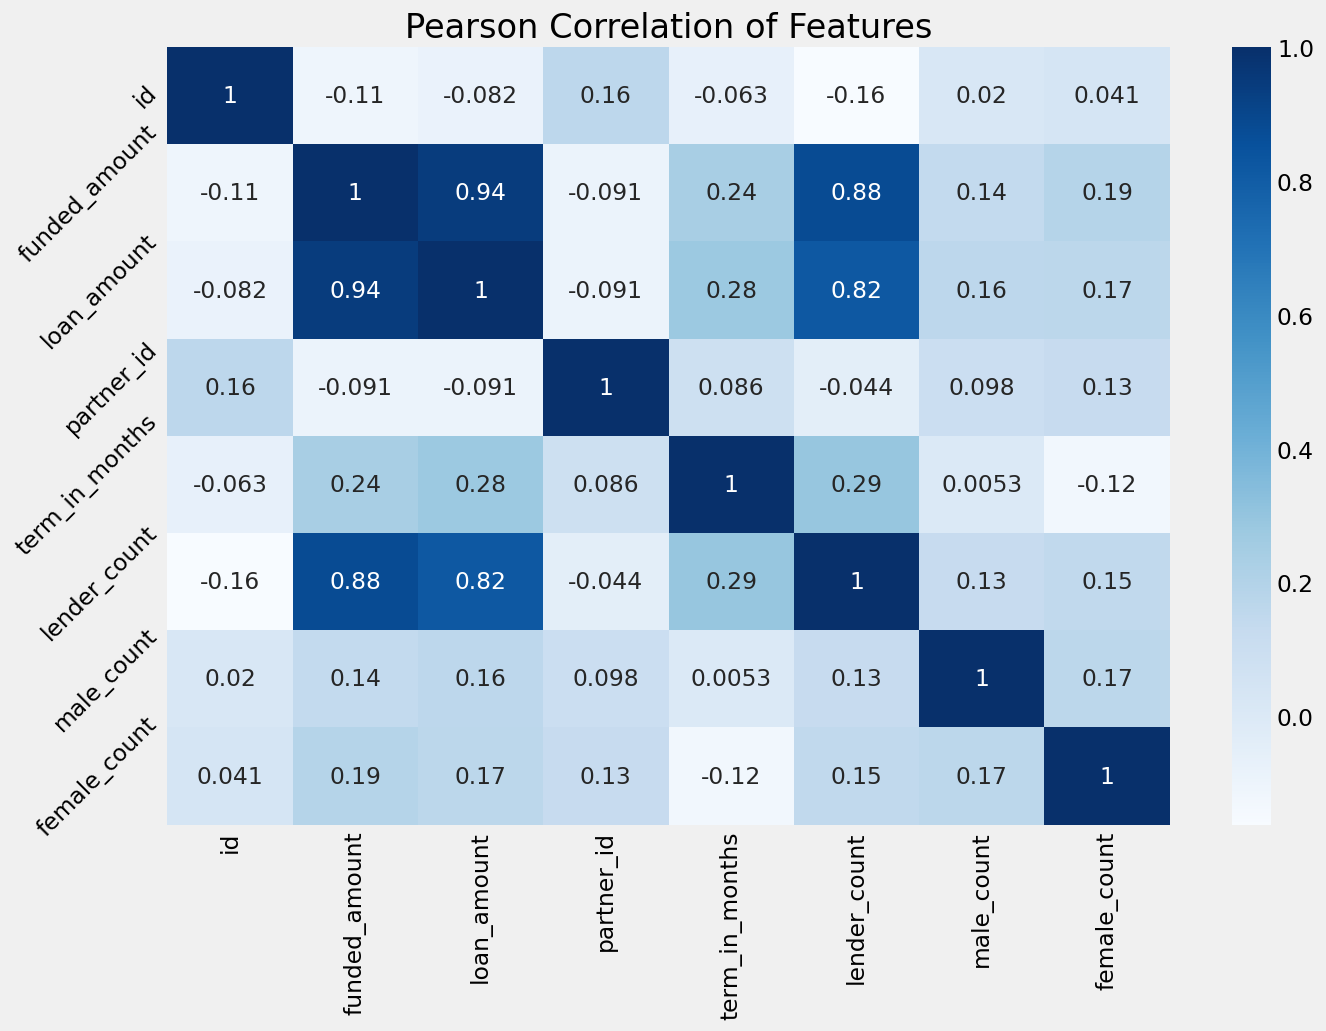

In [730]:
corr = z.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

In [731]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(x, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order and store the indices
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(x.shape[1]):
    print(f"{f + 1}. feature {x.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature loan_amount (0.8911206943196871)
2. feature lender_count (0.059613699547601075)
3. feature term_in_months (0.02310327086311267)
4. feature id (0.015971456515774744)
5. feature partner_id (0.006871642254550291)
6. feature female_count (0.0019685212157772736)
7. feature male_count (0.0013507152834967848)


In [732]:
x=x.drop(['male_count','female_count','partner_id'], axis=1)

In [733]:
x = np.array(x)
y = np.array(y)

In [734]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [735]:
x_train

array([[1199789,    1925,      20,      72],
       [ 755274,     500,      14,      16],
       [1036326,     300,      11,      12],
       ...,
       [1060155,     400,      14,      16],
       [ 846026,     675,      17,      24],
       [1328930,     400,      11,       0]])

In [736]:
y_train

array([1925,  500,  300, ...,  400,  675,    0])

In [737]:
reg=LinearRegression()

In [738]:
reg.fit(x_train, y_train)

LinearRegression()

In [739]:
print('Variance score: {}'.format(reg.score(x_test, y_test)))

Variance score: 0.9217722147663894


In [740]:
y_prd=reg.predict(x_test)

In [741]:
y_prd

array([ 154.9582324 ,  157.45754304,  683.48810048, ...,  679.00184826,
       1382.01600288,  467.33048249])

In [742]:
mean_squared_error(y_test,y_prd)

13333.734317617478

In [743]:
r2_score(y_test,y_prd)

0.9217722147663894

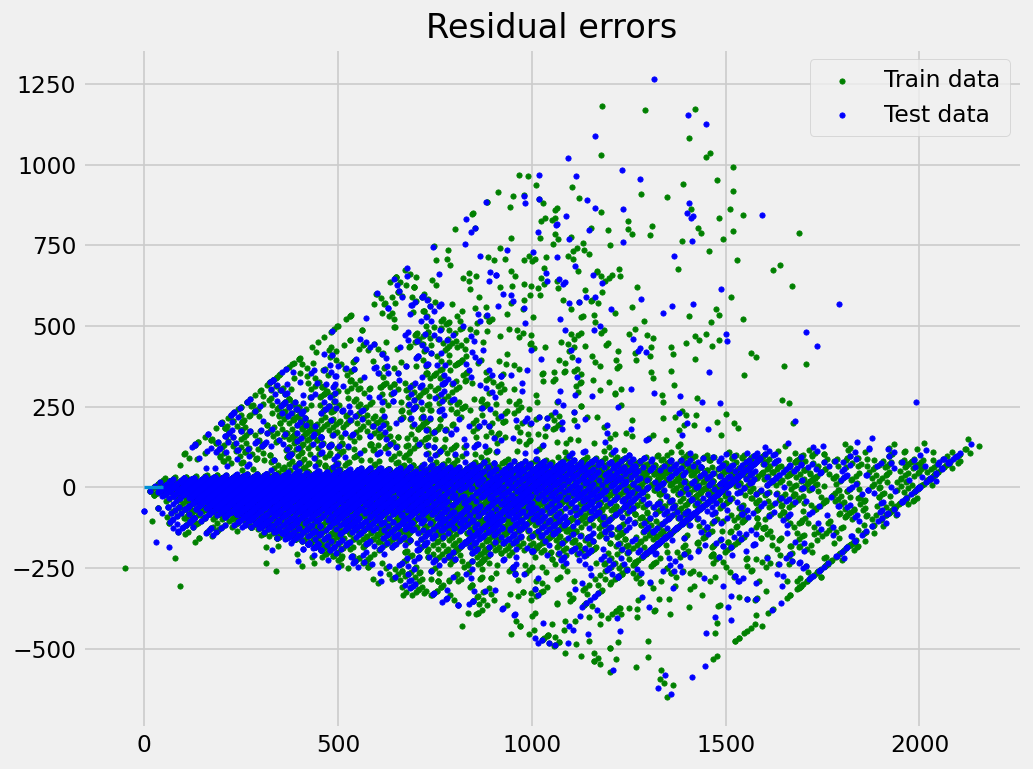

In [744]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(x_train),
			reg.predict(x_train) - y_train,
			color="green", s=10,
			label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(x_test),
			reg.predict(x_test) - y_test,
			color="blue", s=10,
			label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


In [745]:
poly=PolynomialFeatures(degree=2, include_bias=False)

In [746]:
poly_fet=poly.fit_transform(x)

In [747]:
x_train_p,x_test_p,y_train_p,y_test_p=train_test_split(poly_fet,y,test_size=0.25,random_state=0)

In [748]:
reg.fit(x_train_p,y_train_p)

LinearRegression()

In [749]:
y_pred_p=reg.predict(x_test_p)

In [750]:
mean_squared_error(y_test_p,y_pred_p)

8938.581648958803

In [751]:
r2_score(y_test_p,y_pred_p)

0.9478022594768165

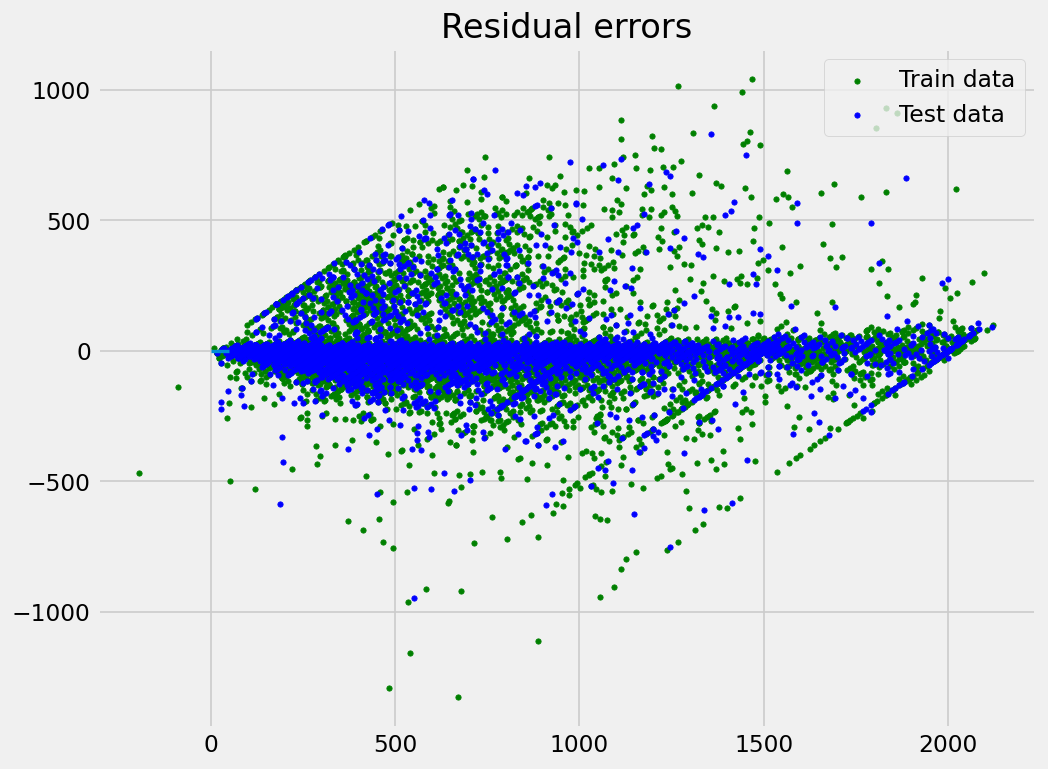

In [752]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(x_train_p),
			reg.predict(x_train_p) - y_train_p,
			color="green", s=10,
			label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(x_test_p),
			reg.predict(x_test_p) - y_test_p,
			color="blue", s=10,
			label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


In [753]:
dtr=DecisionTreeRegressor()

In [754]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [755]:
yd_pred=dtr.predict(x_test)

In [756]:
mean_squared_error(y_test,yd_pred)

12936.510118785745

In [757]:
r2_score(y_test,yd_pred)

0.9241026923787072

In [758]:
rfr=RandomForestRegressor()

In [759]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [760]:
yf_pred=rfr.predict(x_test)

In [761]:
mean_squared_error(y_test,yf_pred)

6708.3793444786625

In [762]:
r2_score(y_test,yf_pred)

0.9606425592317309

In [763]:
data['date']=pd.to_datetime(data['date'])

<ipython-input-763-72deaade1b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=pd.to_datetime(data['date'])


In [822]:
time_s=data[['date','funded_amount']]

In [823]:
time_s.head()

date  funded_amount
0 2017-02-20            500
1 2016-10-11            325
2 2016-07-25            800
3 2017-06-02            425
4 2015-03-25            275

In [824]:
time_s=time_s[time_s['funded_amount']!=0]

In [825]:
time_ss=time_s

In [826]:
time_ss['year_month'] = time_ss['date'].dt.to_period('M')

In [827]:
time_s.set_index('date',inplace=True)

In [828]:
#time_s.set_index('date', inplace=True)

In [829]:
time_s.sort_index(ascending=True, inplace=True)

In [830]:

time_s['funded_amount'] = (time_s['funded_amount'] - time_s['funded_amount'].min()) / (time_s['funded_amount'].max() - time_s['funded_amount'].min())

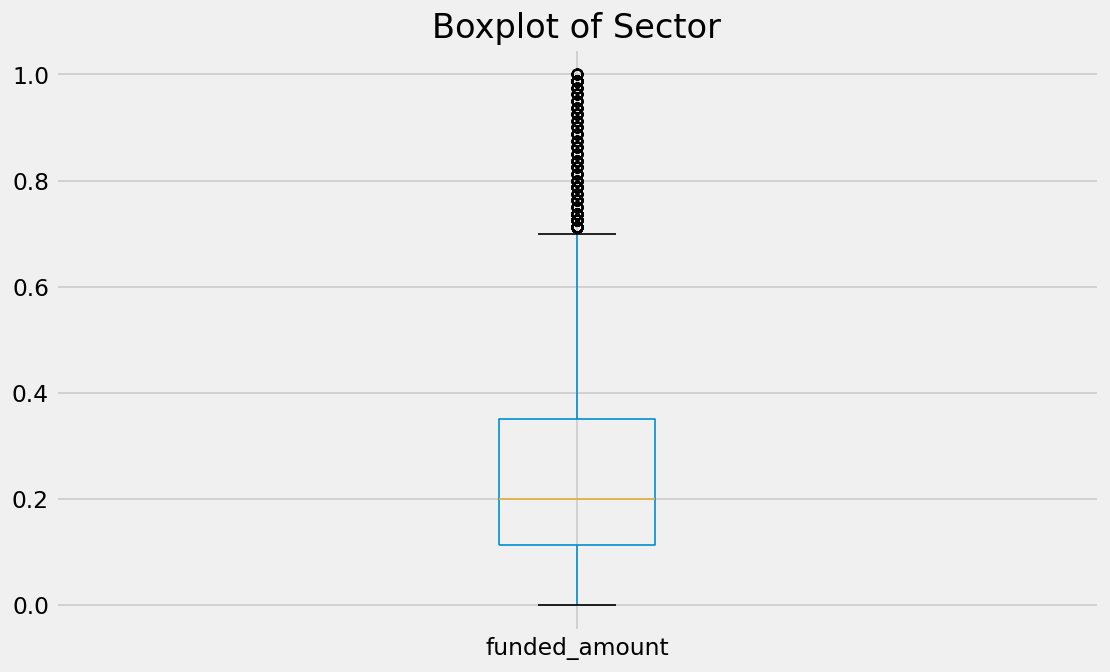

In [831]:
plt.figure(figsize=(10, 6))
time_s.boxplot(column='funded_amount')
plt.title(f'Boxplot of Sector')
plt.show()

In [832]:
time_s.dropna(inplace=True)

In [833]:
time_s = time_s[time_s['funded_amount'] != 0]

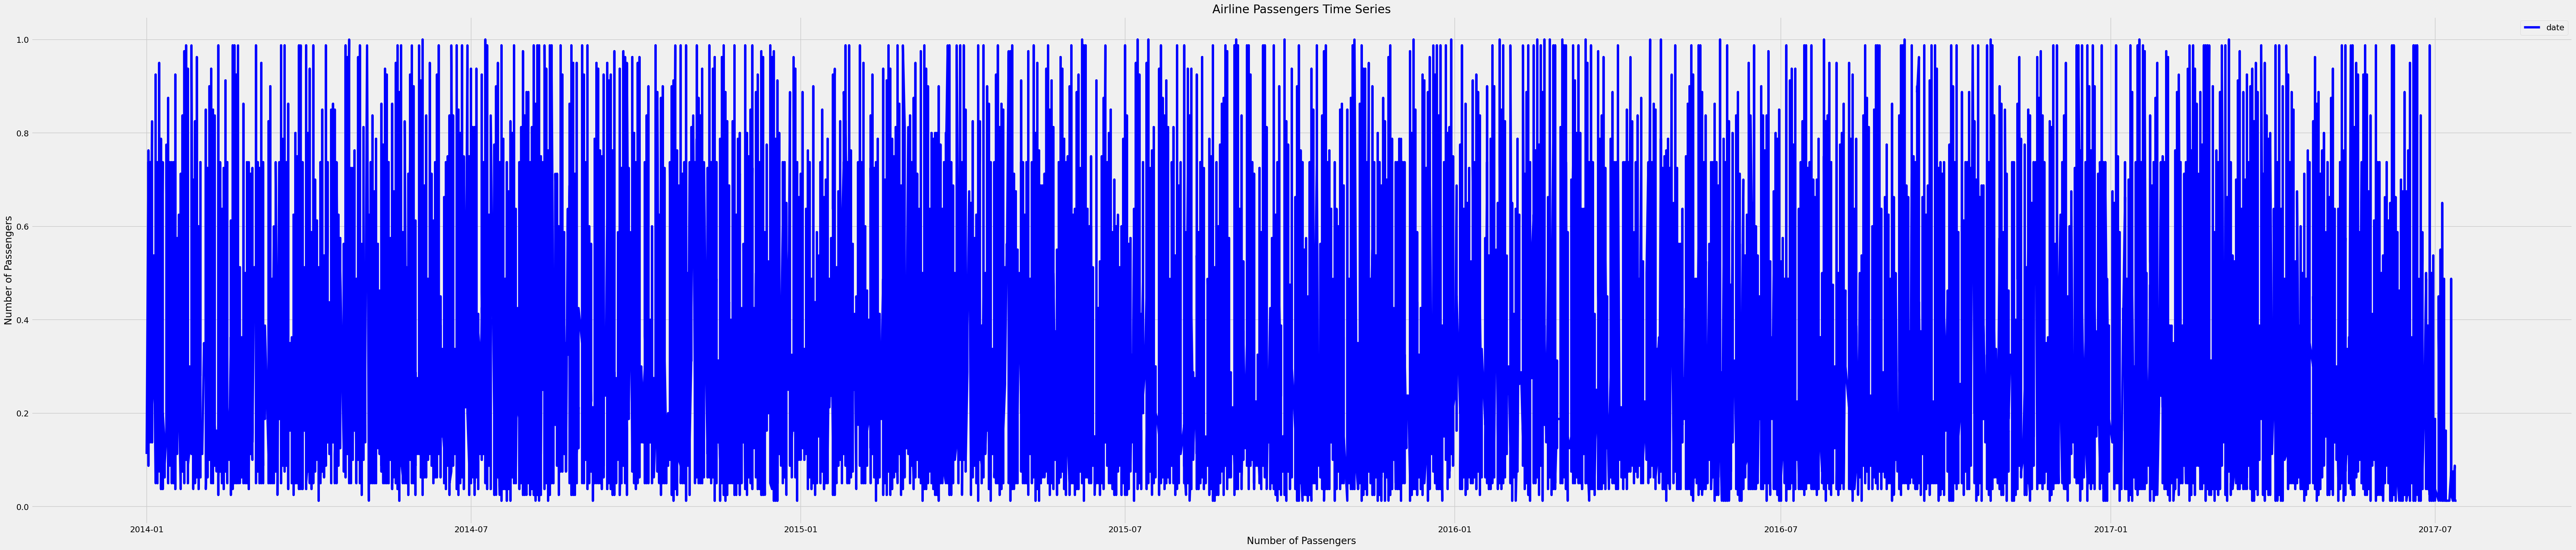

In [834]:
plt.figure(figsize=(70, 15))
plt.plot( time_s['funded_amount'], label='date', color='blue')
plt.title('Airline Passengers Time Series')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

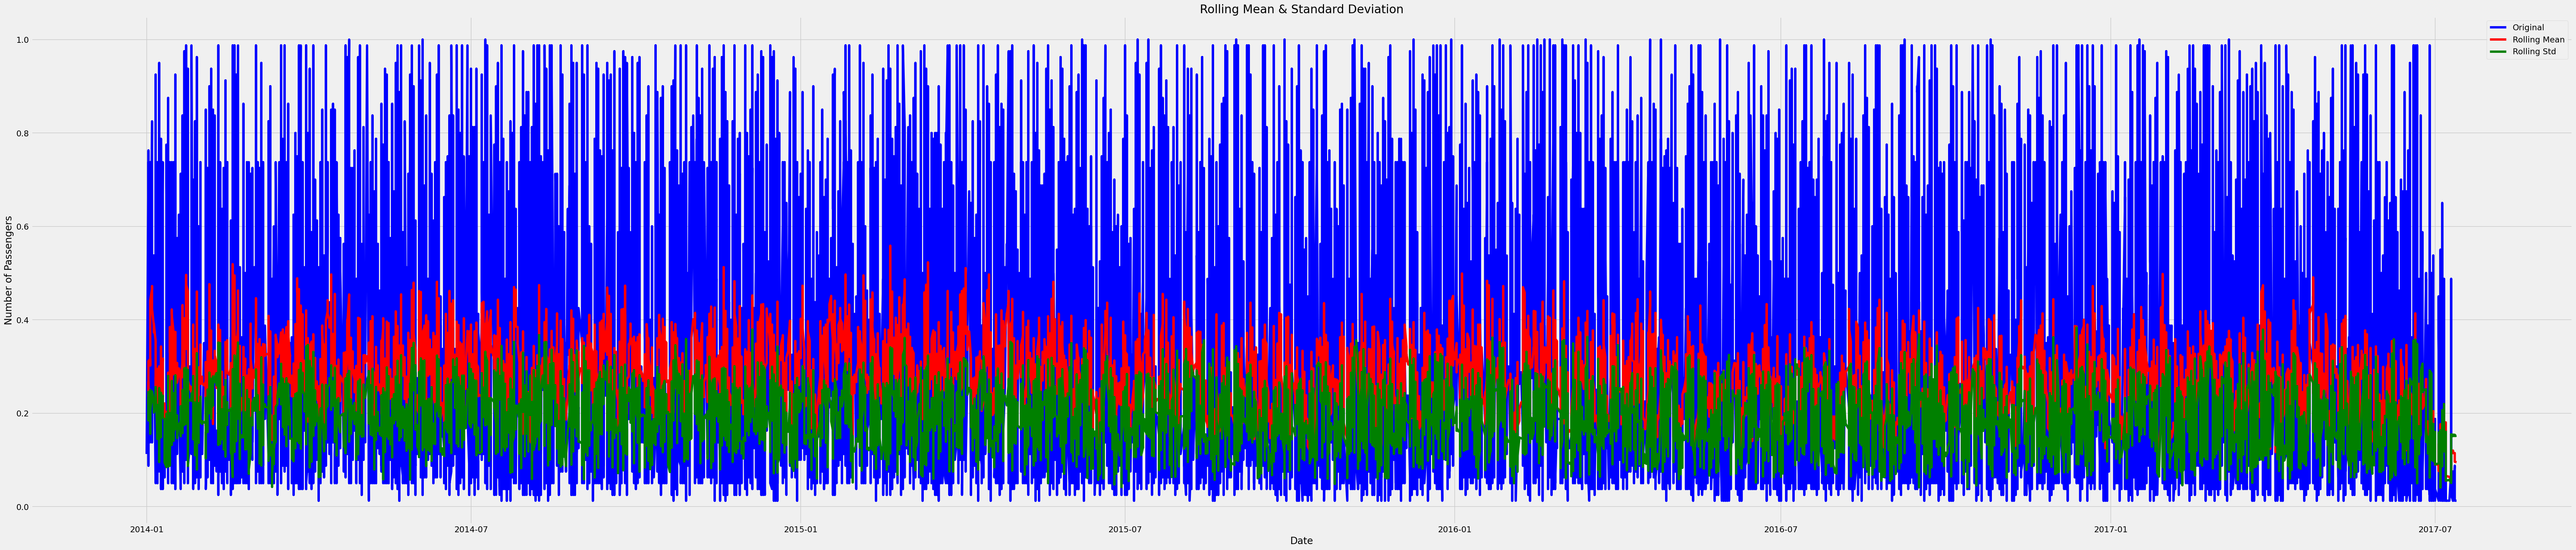

In [835]:
# Step 2: Stationarize the series
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(70, 15))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    # #result = adfuller(series)
    # print('ADF Statistic:', result[0])
    # print('p-value:', result[1])
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

# Apply stationarize_series function
stationarize_series(time_s['funded_amount'])

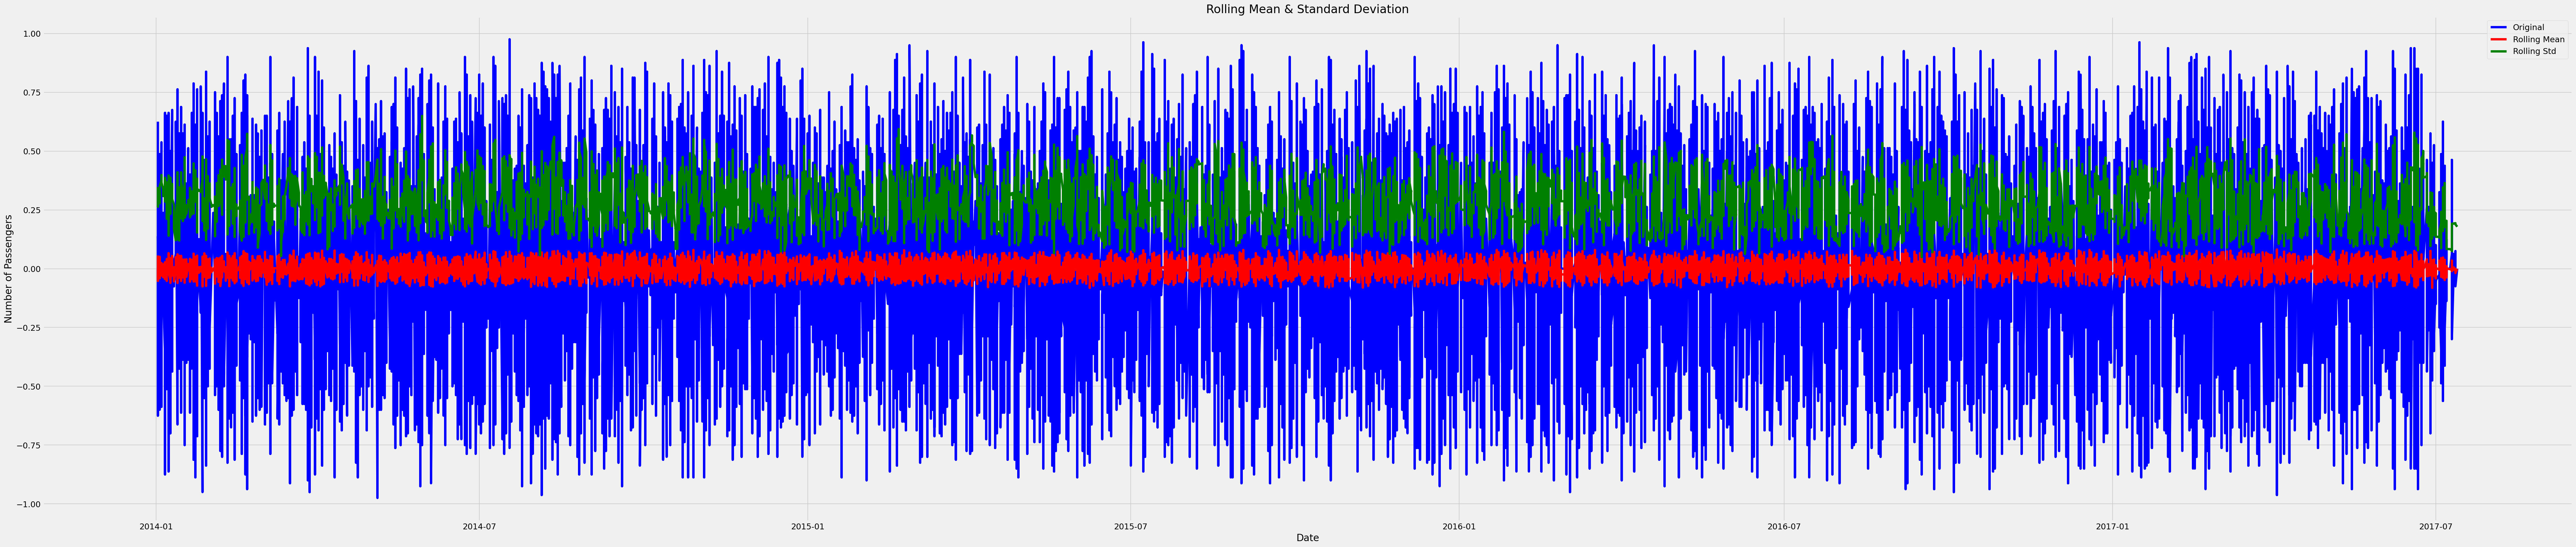

In [836]:
stationarize_series(time_s.funded_amount.diff().dropna())

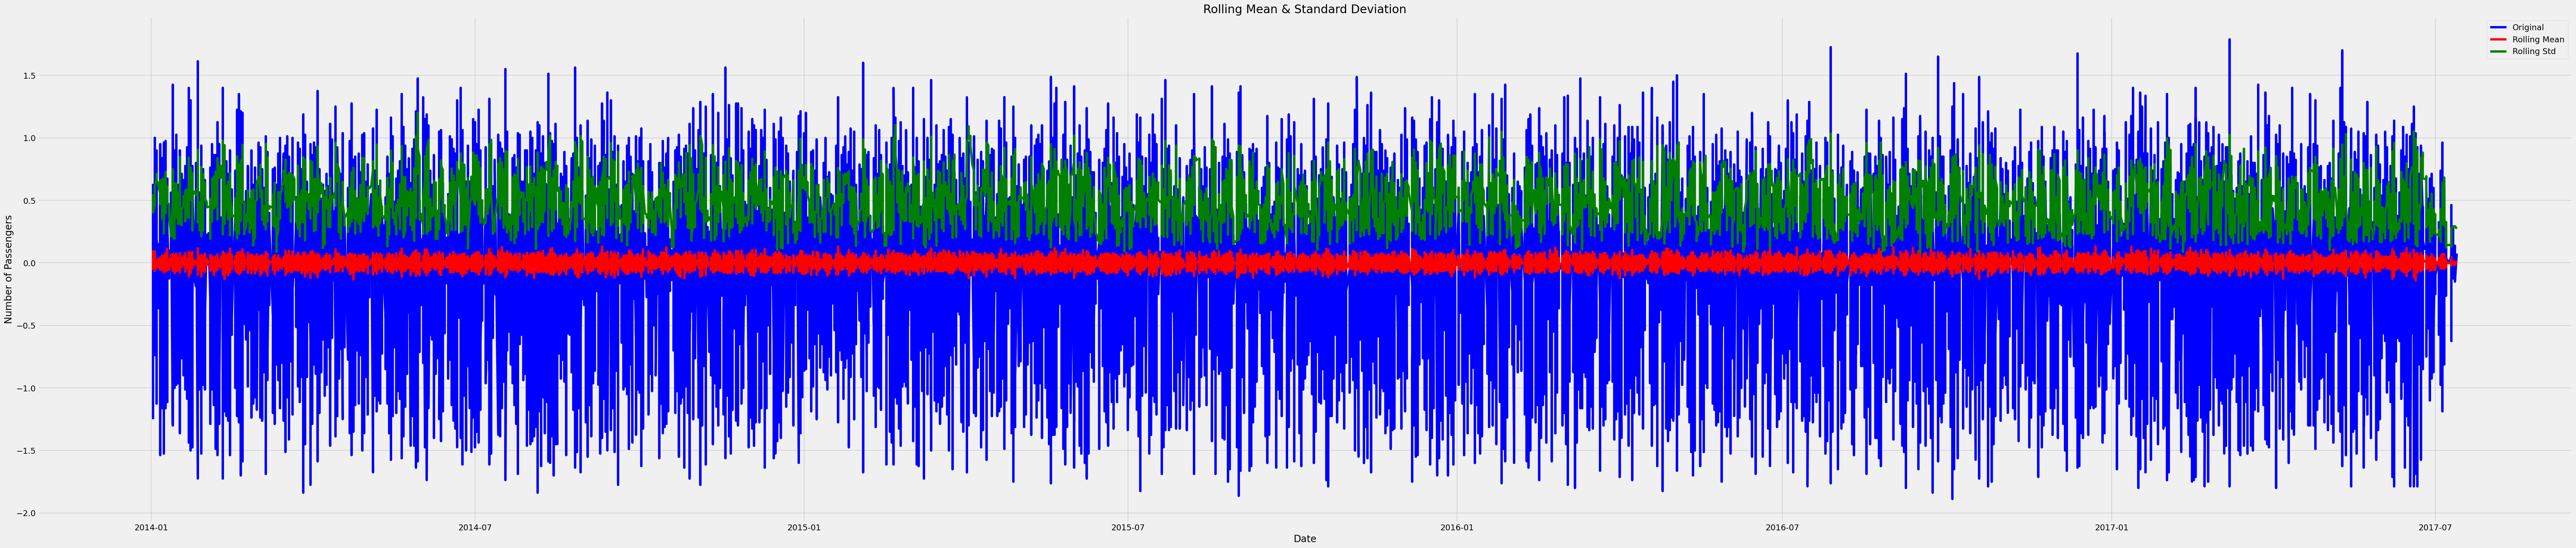

In [837]:
stationarize_series(time_s.funded_amount.diff().diff().dropna())

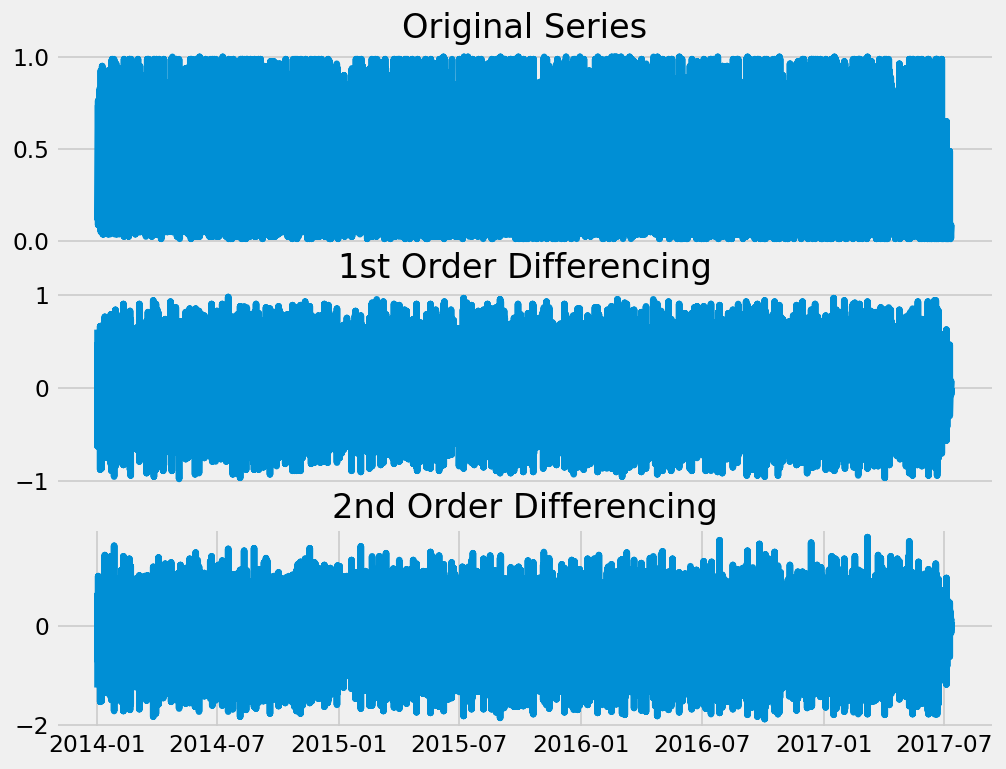

In [838]:
# Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(time_s.funded_amount); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(time_s.funded_amount.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(time_s.funded_amount.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

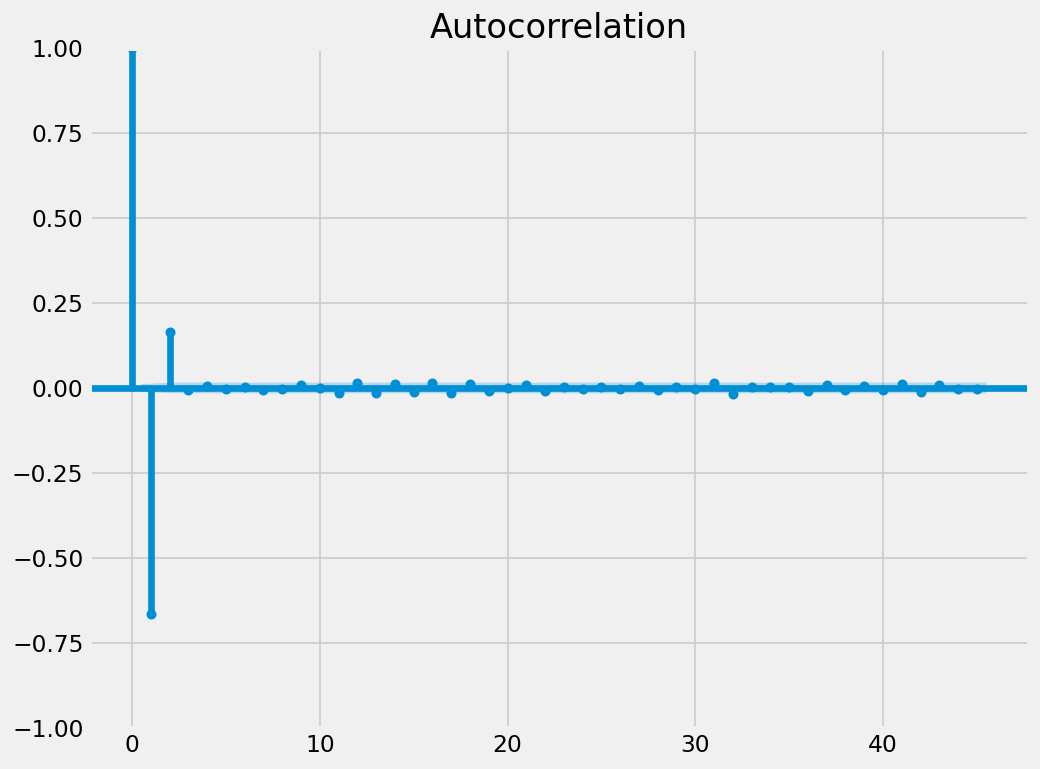

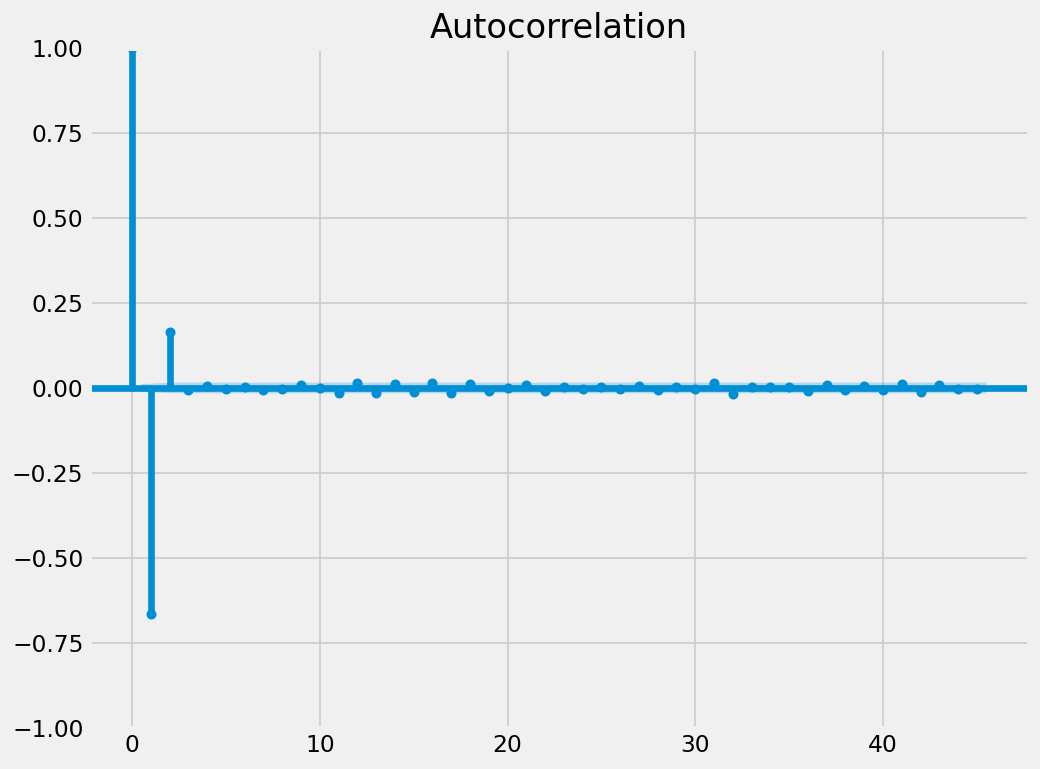

In [839]:
plot_acf(time_s.funded_amount.diff().diff().dropna())


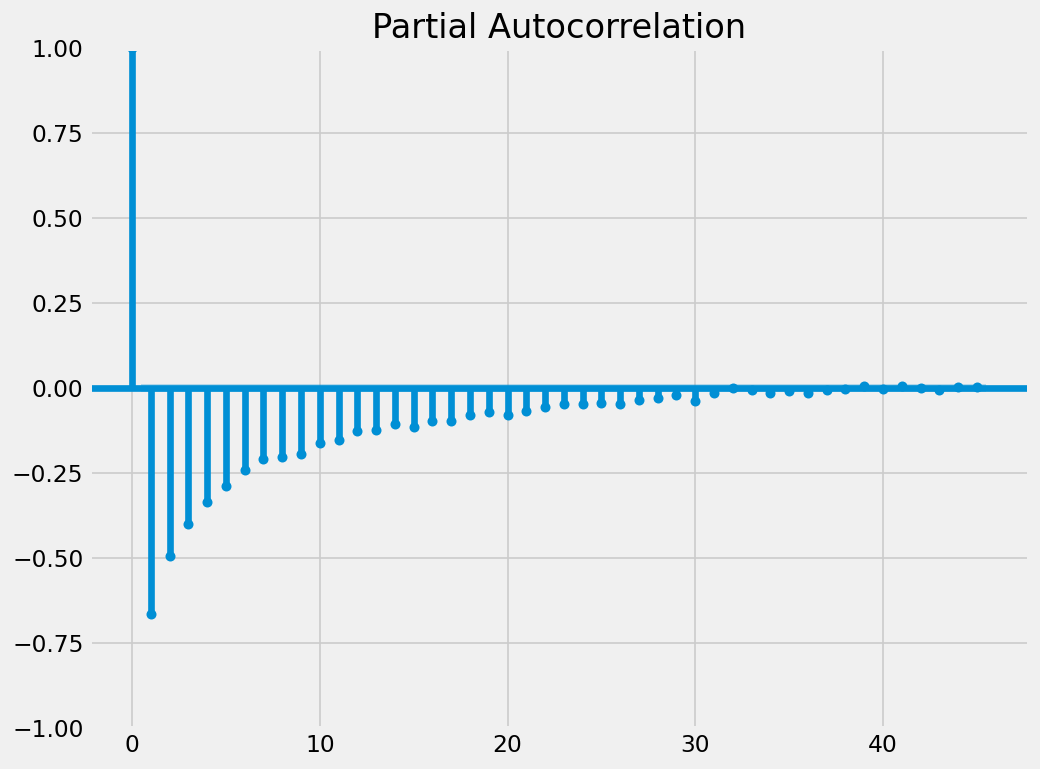

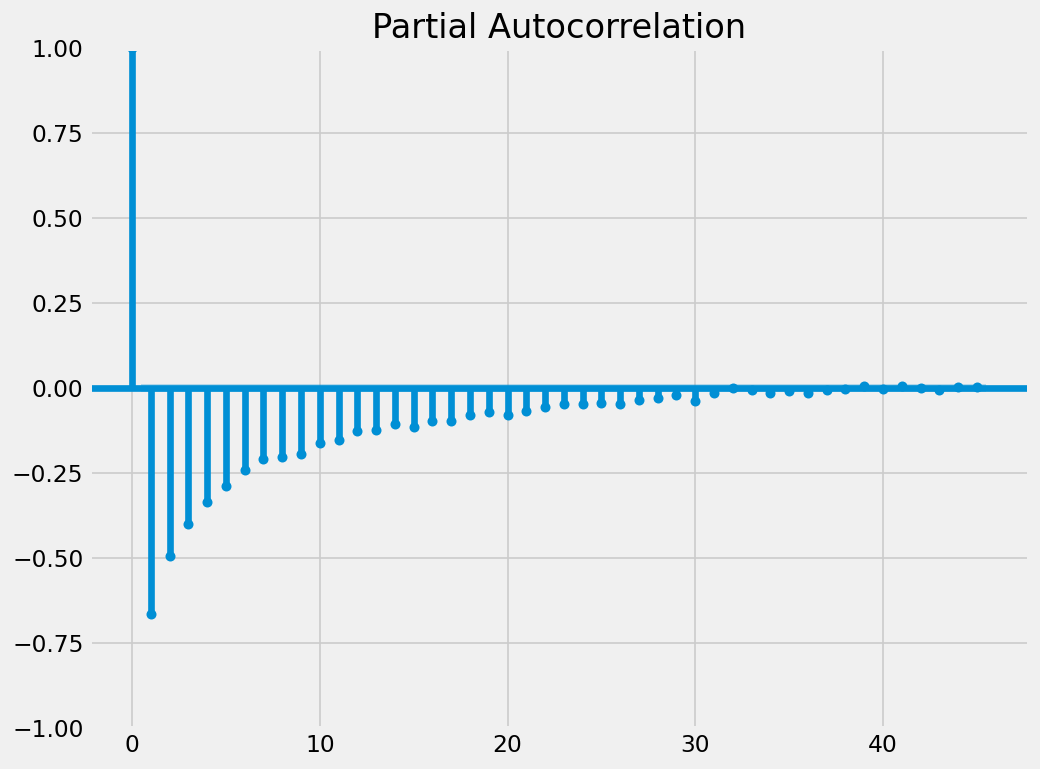

In [840]:
plot_pacf(time_s.funded_amount.diff().diff().dropna())

In [841]:
train_size = 0.6
total_rows = len(time_s)
train_rows = int(train_size * total_rows)

# Split the dataset
train = time_s[:train_rows]
test = time_s[train_rows:]

In [842]:
train.sort_index(ascending=True, inplace=True)

In [843]:
test.sort_index(ascending=True, inplace=True)

In [885]:
model = ARIMA(time_s['funded_amount'], order=(0,2,1))
arima_model = model.fit()
#arima_model.summary()

# Step 5: Predict
forecast = arima_model.predict()
#forecast = arima_model.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [886]:
len(train)

18093

In [887]:
start_date = len(train)
end_date = (len(train)-1) +2

In [888]:
#forecast = arima_model.predict(start=start_date,end=end_date)

In [889]:
train

funded_amount year_month
date                                
2014-01-01         0.1125    2014-01
2014-01-02         0.7375    2014-01
2014-01-02         0.1125    2014-01
2014-01-02         0.1125    2014-01
2014-01-02         0.0875    2014-01
...                   ...        ...
2016-04-13         0.1875    2016-04
2016-04-13         0.1875    2016-04
2016-04-13         0.1625    2016-04
2016-04-13         0.3375    2016-04
2016-04-13         0.1000    2016-04

[18093 rows x 2 columns]

In [890]:
test

funded_amount year_month
date                                
2016-04-13         0.3375    2016-04
2016-04-13         0.4125    2016-04
2016-04-13         0.4500    2016-04
2016-04-13         0.3375    2016-04
2016-04-13         0.4125    2016-04
...                   ...        ...
2017-07-11         0.0750    2017-07
2017-07-11         0.0125    2017-07
2017-07-12         0.0875    2017-07
2017-07-12         0.0125    2017-07
2017-07-13         0.0125    2017-07

[12062 rows x 2 columns]

In [891]:
forecast

date
2014-01-01    0.000000
2014-01-02    0.168750
2014-01-02    1.362500
2014-01-02    0.112500
2014-01-02    0.112500
                ...   
2017-07-11    0.012488
2017-07-11    0.074992
2017-07-12    0.012488
2017-07-12    0.087493
2017-07-13    0.012488
Name: predicted_mean, Length: 30155, dtype: float64

In [892]:
forecast.dropna(inplace=True)

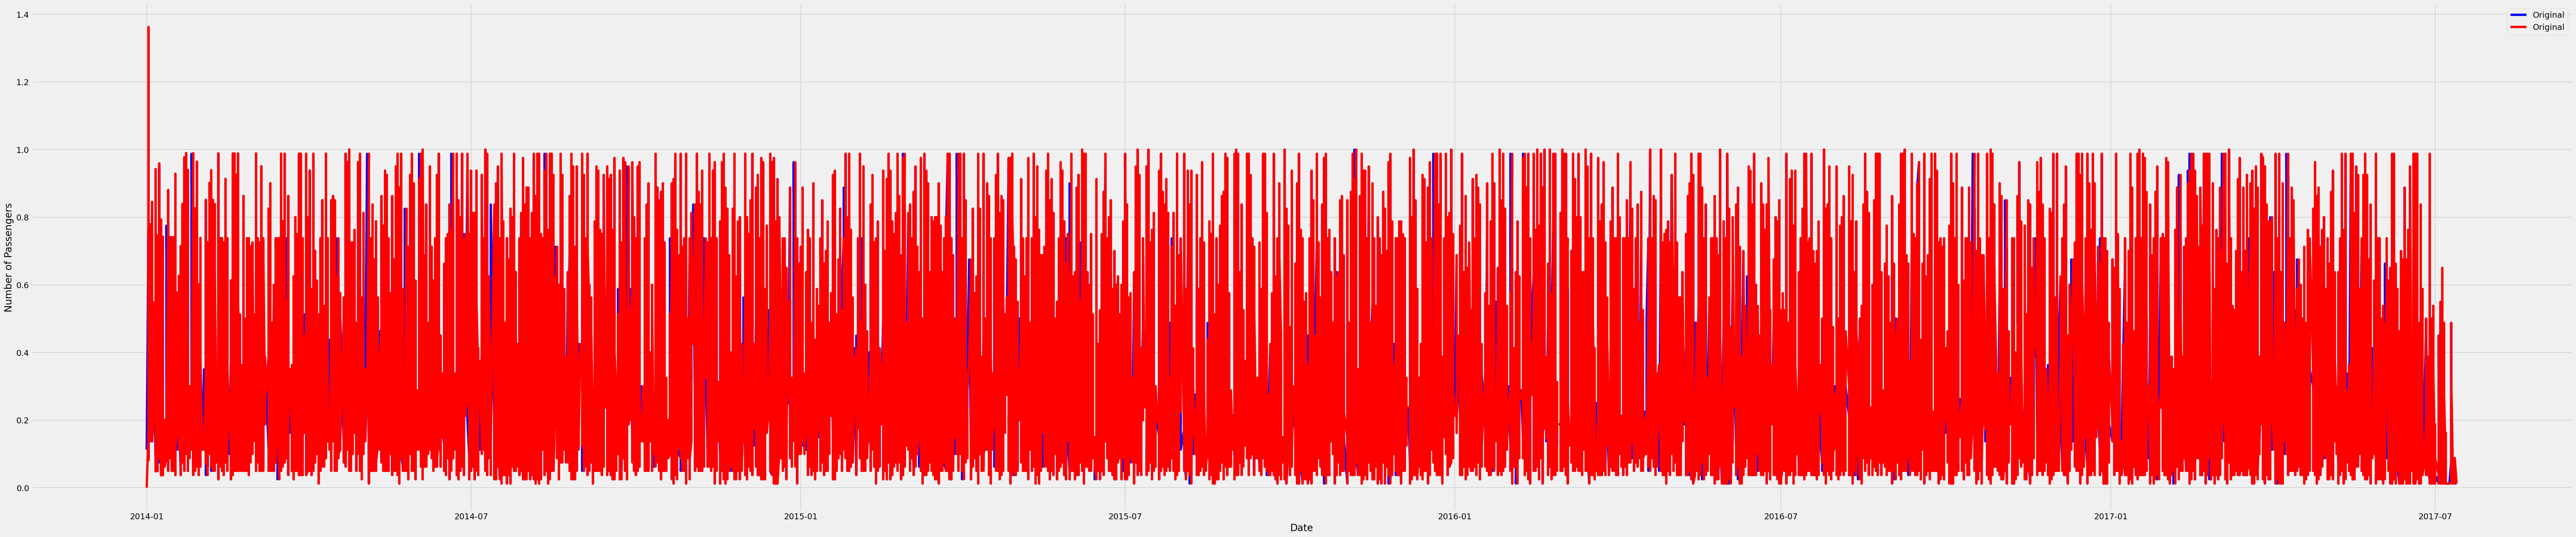

In [893]:

plt.figure(figsize=(70, 15))
plt.plot(time_s['funded_amount'], label='Original', color='blue')
plt.plot(forecast, label='Original', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [896]:
mse=mean_squared_error(time_s["funded_amount"], forecast)
mse

0.08242434814207027

In [897]:
 np.sqrt(mse)

0.2870964091417207

In [898]:
r2_score(time_s["funded_amount"], forecast)

-0.9302303332492559

In [899]:
 mean_absolute_error(time_s["funded_amount"], forecast)




0.2115629667675603

In [900]:
 np.mean(np.abs((train["funded_amount"] - forecast) / train["funded_amount"])) * 100

143.32681676371777

In [901]:
time_s

funded_amount year_month
date                                
2014-01-01         0.1125    2014-01
2014-01-02         0.7375    2014-01
2014-01-02         0.1125    2014-01
2014-01-02         0.1125    2014-01
2014-01-02         0.0875    2014-01
...                   ...        ...
2017-07-11         0.0750    2017-07
2017-07-11         0.0125    2017-07
2017-07-12         0.0875    2017-07
2017-07-12         0.0125    2017-07
2017-07-13         0.0125    2017-07

[30155 rows x 2 columns]

In [902]:
# start_index = "2017-07-14"
# end_index = "2023-07-13"

# # Generate the forecast
# forecast = arima_model.predict(start=start_index, end=end_index, typ='levels',dynamic=False)




In [903]:
forecast

date
2014-01-01    0.000000
2014-01-02    0.168750
2014-01-02    1.362500
2014-01-02    0.112500
2014-01-02    0.112500
                ...   
2017-07-11    0.012488
2017-07-11    0.074992
2017-07-12    0.012488
2017-07-12    0.087493
2017-07-13    0.012488
Name: predicted_mean, Length: 30155, dtype: float64

In [904]:
# # Define the start and end index for forecasting

# forecast_dates = pd.date_range(start=time_s.index[-1], periods=len(forecast) + 1, freq='M')[1:]

# # Set the index of the forecast to this date range
# forecast.index = forecast_dates

# # Now plot the original time series and the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(time_s['funded_amount'], label='Original Time Series')
# plt.plot(forecast, label='Forecast', linestyle='--')

# # Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Funded Amount')
# plt.title('Time Series Forecast')

# # Show the legend
# plt.legend()

# # Show the plot
# plt.show()


<Axes: xlabel='date'>

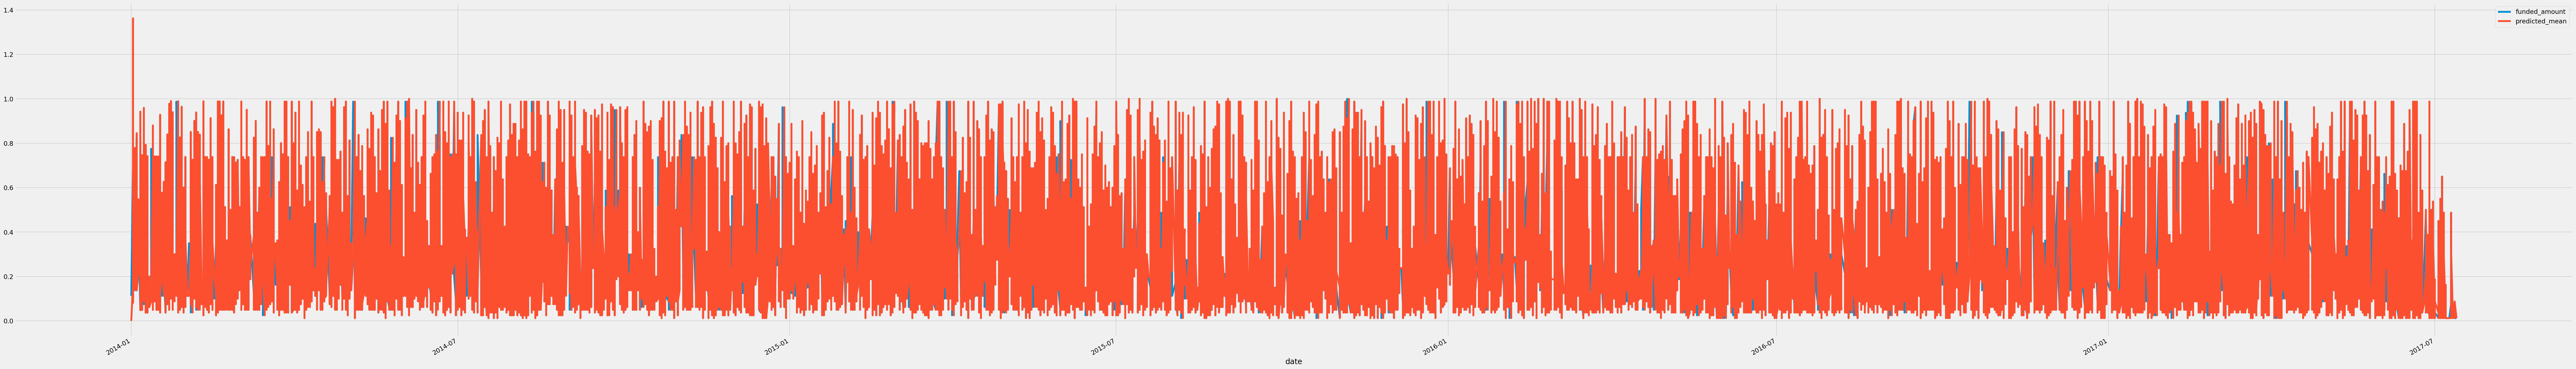

In [905]:
# plt.figure(figsize=(70, 15))
# #plt.plot(time_s['funded_amount'], label='Original', color='blue')
# plt.plot(forecast, label='Forecast', color='red')
# plt.xlabel('Date')
# plt.ylabel('Number of Passengers')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()

time_s['funded_amount'].plot(figsize = (90, 15), legend = True)
forecast.plot(legend = True)

In [906]:


# # Create a new DataFrame to hold the forecast data
# forecast_df = pd.DataFrame({'forecast': forecast})

# # Set the index of the forecast DataFrame to match the time_s index
# forecast_df.index = time_s.index

# # Plot the original data and the forecast
# plt.figure(figsize=(10, 6))
# plt.plot(time_s.index, time_s['funded_amount'], label='Original', color='blue')
# plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
# plt.title('Airline Passengers Forecast using ARIMA')
# plt.xlabel('Date')
# plt.ylabel('Number of Passengers')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()
# plt.show()

In [907]:
#monthly_summary = time_ss.groupby('year_month')['funded_amount'].sum().reset_index()


In [908]:
#monthly_summary.columns = ['year_month', 'total_funded_amount']

In [909]:
#monthly_summary.set_index('year_month', inplace=True)


In [910]:
#monthly_summary.head()

total_funded_amount
year_month                     
2014-01                158.2625
2014-02                166.8000
2014-03                177.9250
2014-04                171.2875
2014-05                188.3375

total_funded_amount    float64
dtype: object